# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [2]:
#Import modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [4]:
# Import and read data
df = pd.read_csv('Wholesale customers data.csv')

print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### Check if the dataset contains null values

In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

- Dataset does not contain any null values

##### Describe the data statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


##### Heatmap of the dataset

<Axes: >

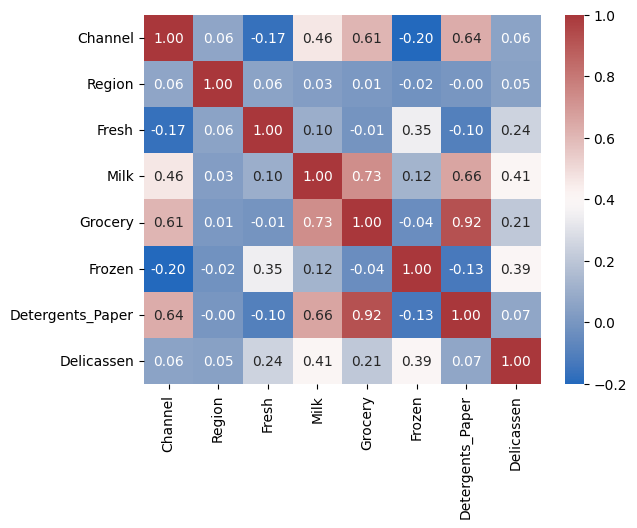

In [7]:
sns.heatmap(df.corr(),  annot=True, fmt='.2f', cmap="vlag")

- The highest correlation is between Grocery and Detergents Paper, the second highest is between grocery and milk and thethird highest is between Detergents Paper and Milk.

##### Pairplot between the variables

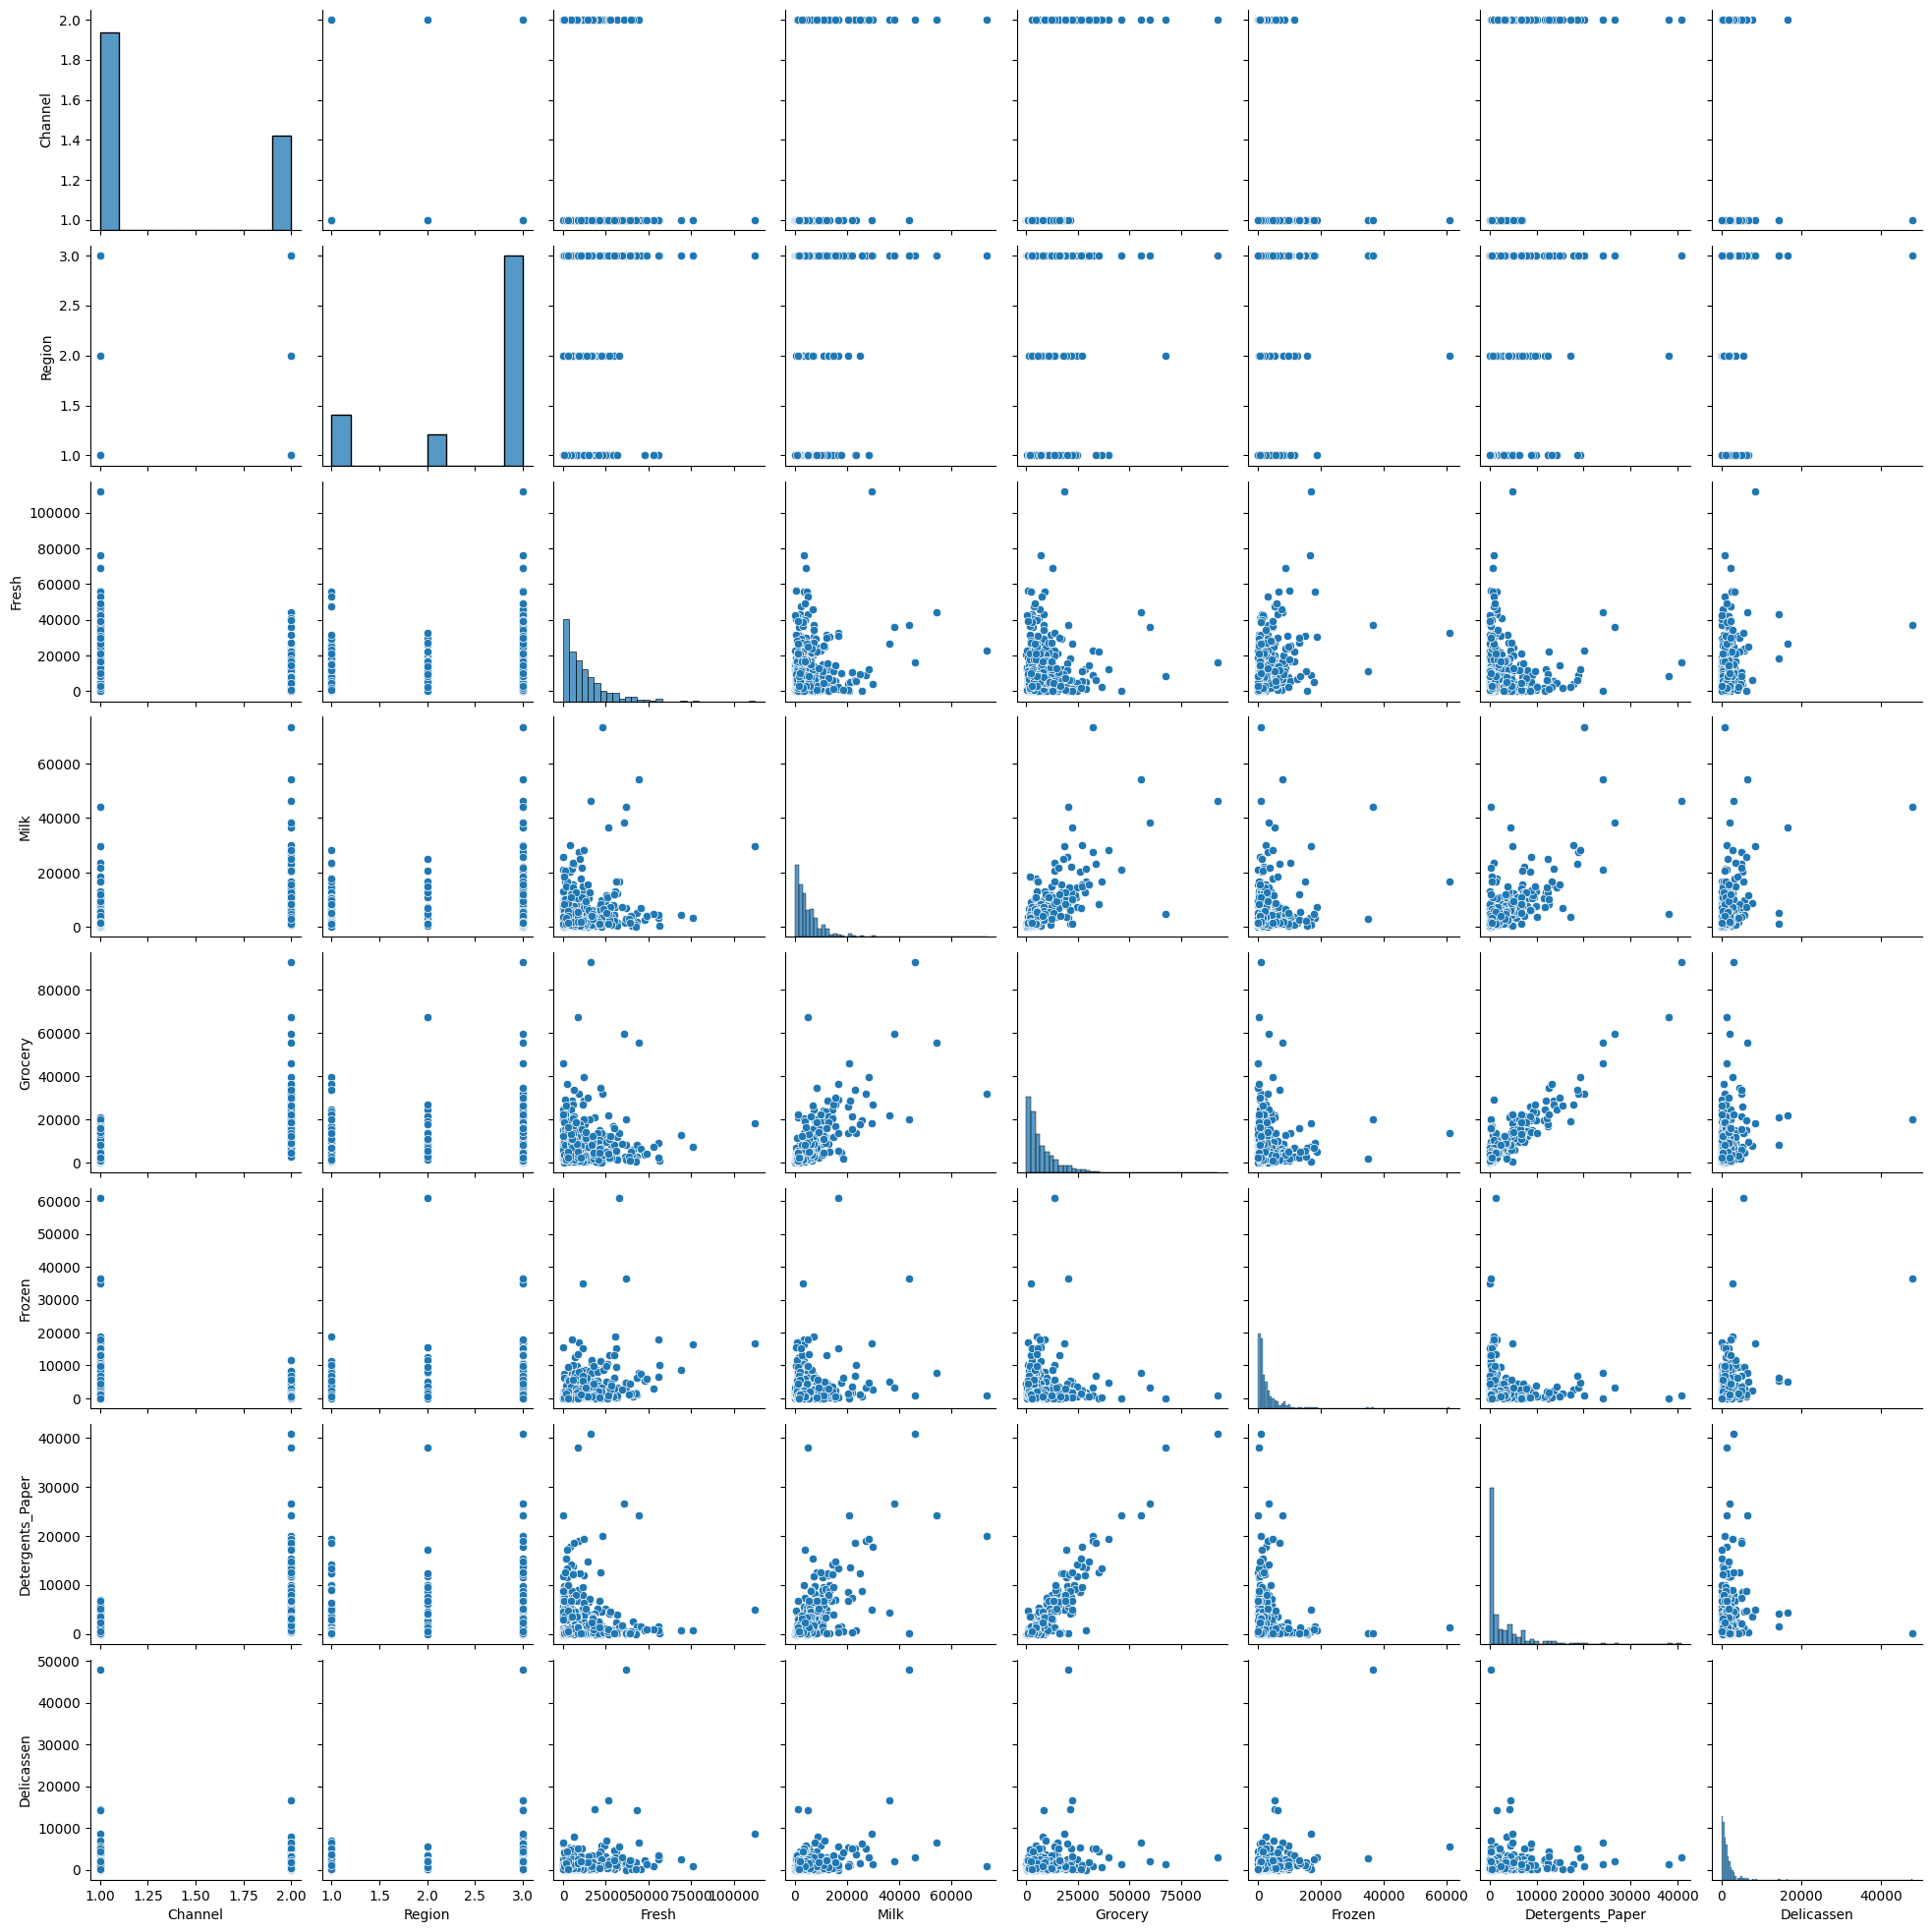

In [8]:
sns.pairplot(df)

##### Pairplot for only continous features

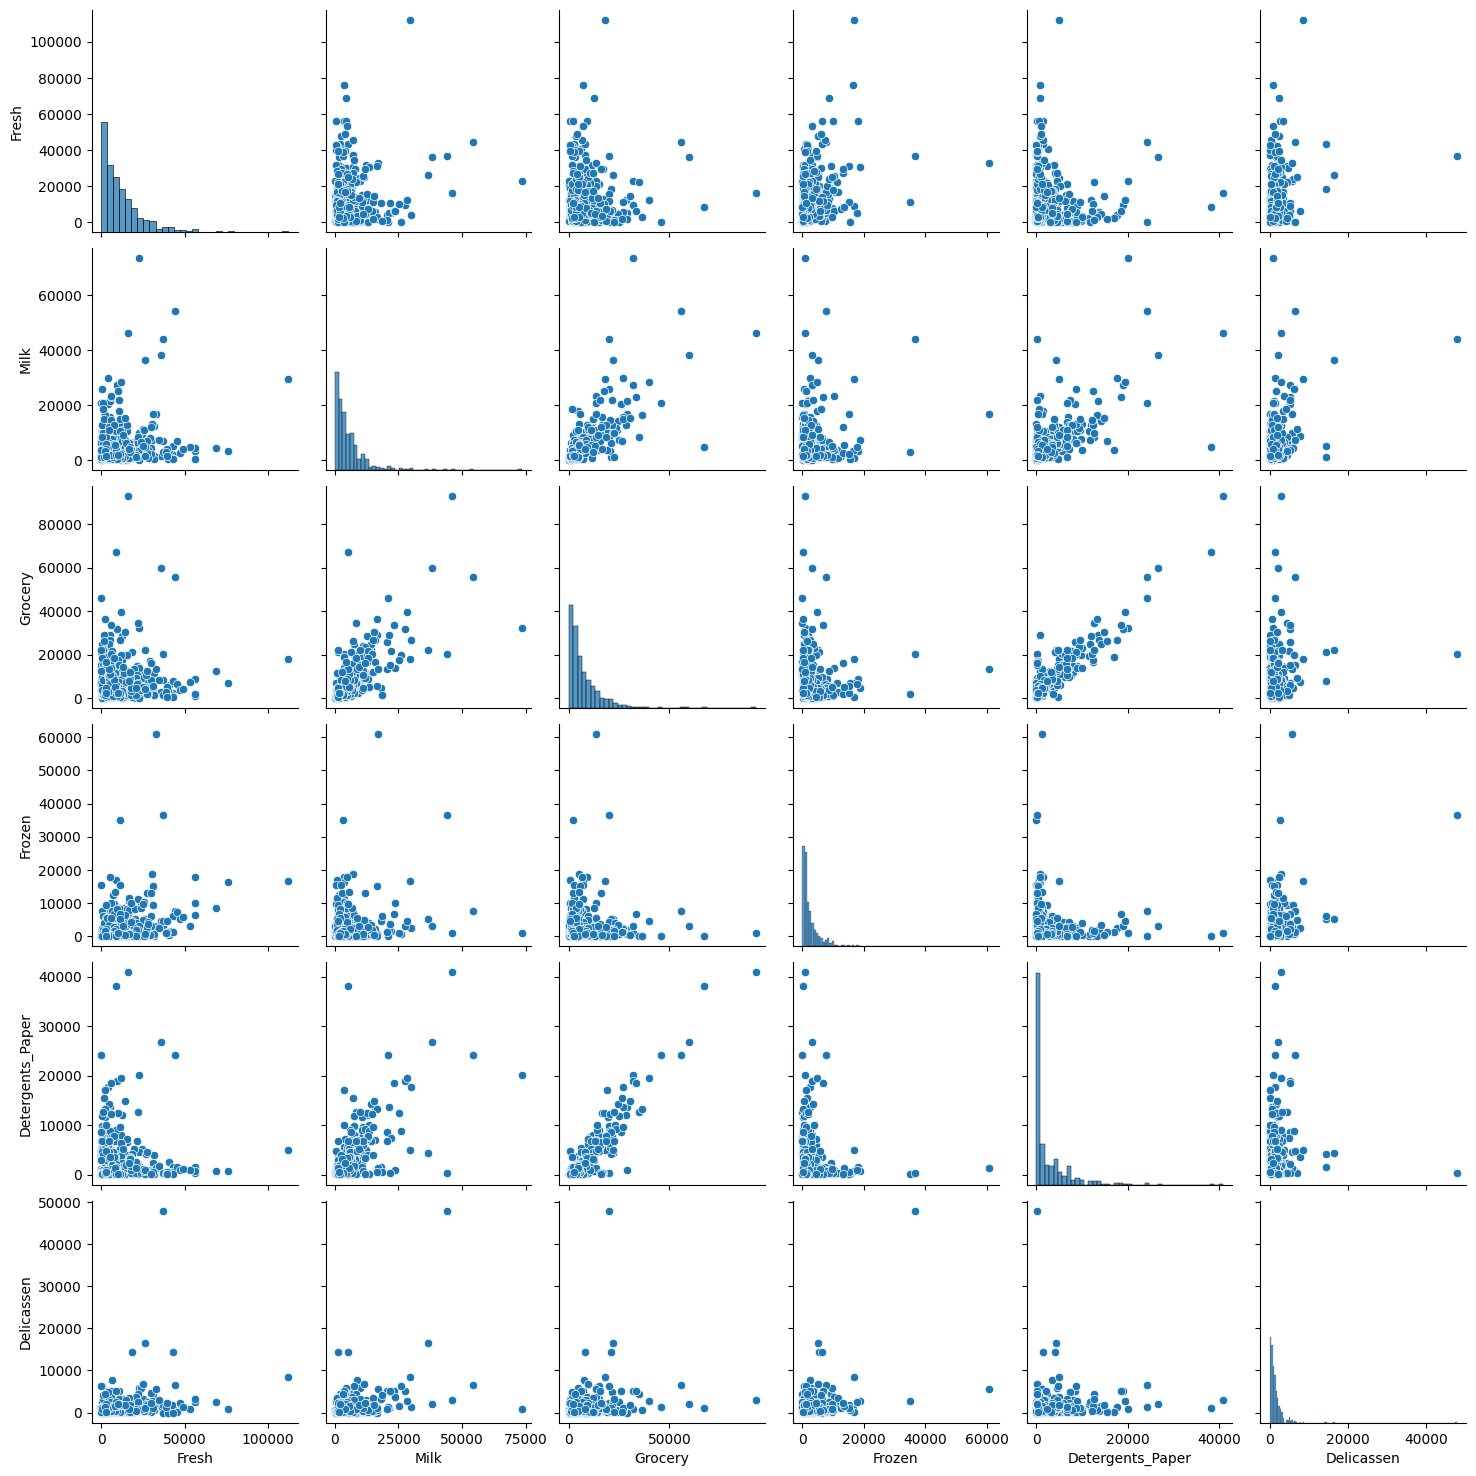

In [9]:
sns.pairplot(df[df.columns[2:8]])

#### Boxplots for discrete variables

##### Boxplots for Channel versus other features

<Axes: xlabel='Channel', ylabel='Delicassen'>

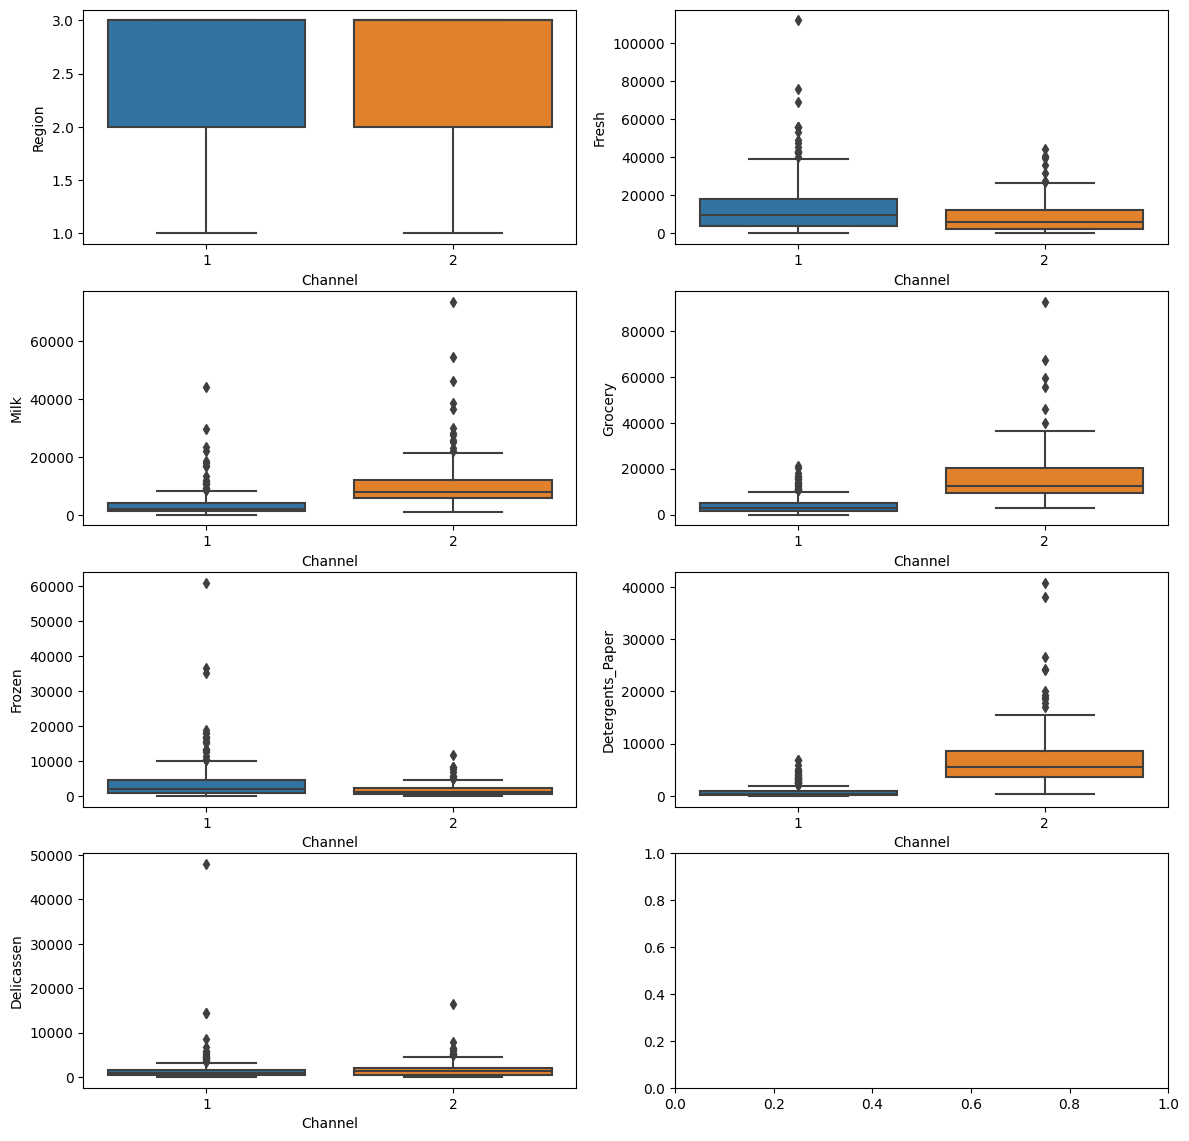

In [10]:
figure, axes = plt.subplots(4, 2, figsize=(14,14))
sns.boxplot(ax=axes[0,0], data=df, y='Region', x='Channel')
sns.boxplot(ax=axes[0,1], data=df, y='Fresh', x='Channel')
sns.boxplot(ax=axes[1,0], data=df, y='Milk', x='Channel')
sns.boxplot(ax=axes[1,1], data=df, y='Grocery', x='Channel')
sns.boxplot(ax=axes[2,0], data=df, y='Frozen', x='Channel')
sns.boxplot(ax=axes[2,1], data=df, y='Detergents_Paper', x='Channel')
sns.boxplot(ax=axes[3,0], data=df, y='Delicassen', x='Channel')

##### Boxplots for Region versus other variables

<Axes: xlabel='Region', ylabel='Delicassen'>

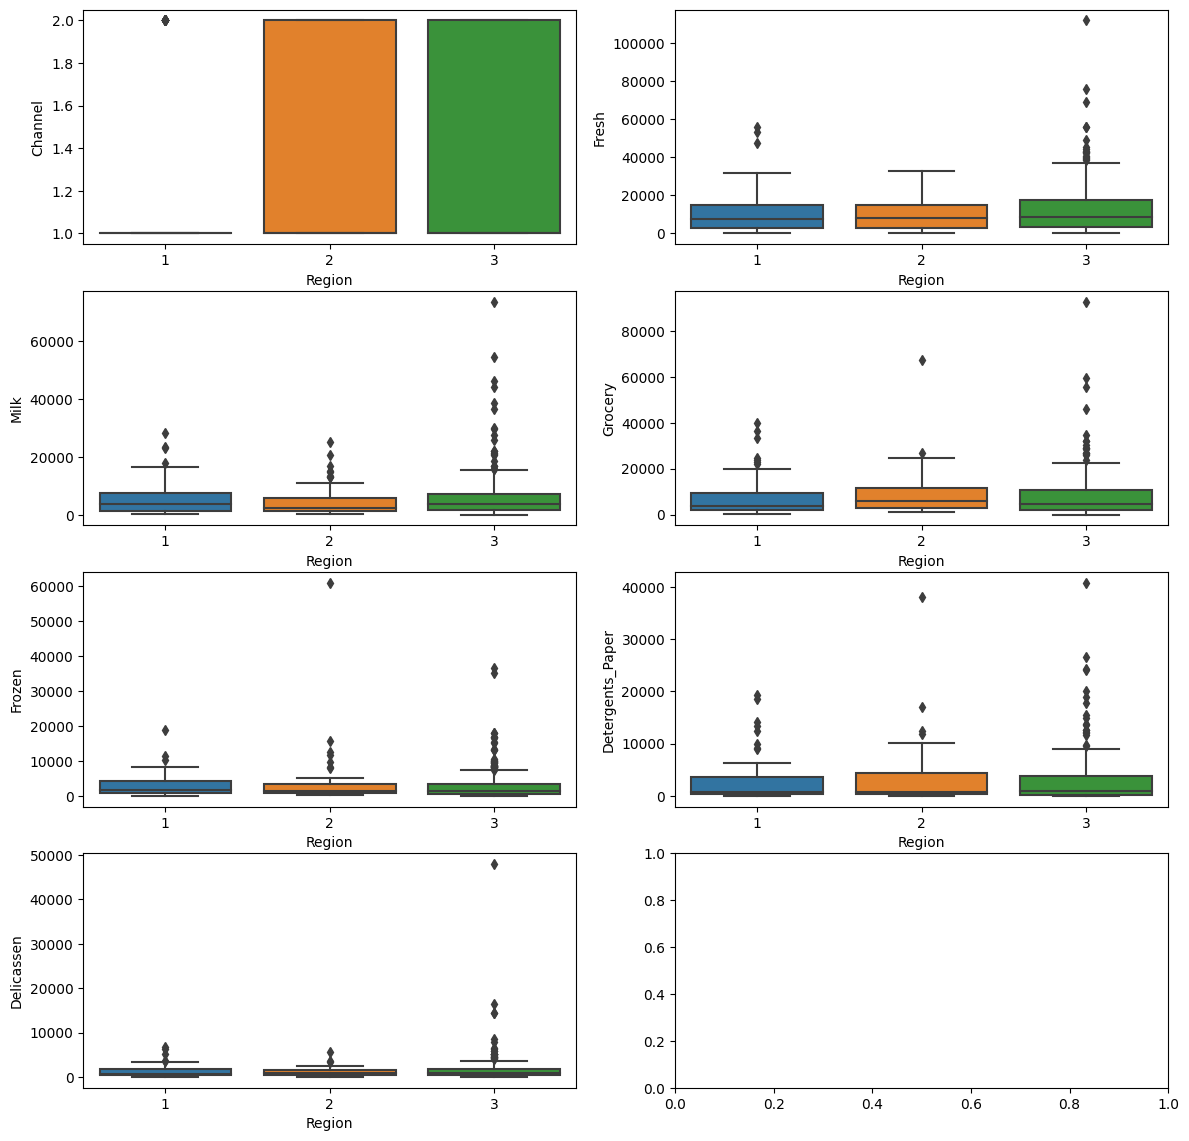

In [11]:
figure, axes = plt.subplots(4, 2, figsize=(14,14))
sns.boxplot(ax=axes[0,0], data=df, y='Channel', x='Region')
sns.boxplot(ax=axes[0,1], data=df, y='Fresh', x='Region')
sns.boxplot(ax=axes[1,0], data=df, y='Milk', x='Region')
sns.boxplot(ax=axes[1,1], data=df, y='Grocery', x='Region')
sns.boxplot(ax=axes[2,0], data=df, y='Frozen', x='Region')
sns.boxplot(ax=axes[2,1], data=df, y='Detergents_Paper', x='Region')
sns.boxplot(ax=axes[3,0], data=df, y='Delicassen', x='Region')

##### Correlation between features

In [12]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


##### PCA for Feature Selection

In [33]:
pca = PCA(n_components=2)
pca = pca.fit(df)

df_pca = pca.transform(df)

In [34]:
df_pca.shape

(440, 2)

##### Scaling Data

In [35]:
scaler = StandardScaler().fit(df_pca)
df_scaled = scaler.transform(df_pca)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [36]:
X = df_scaled

In [37]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

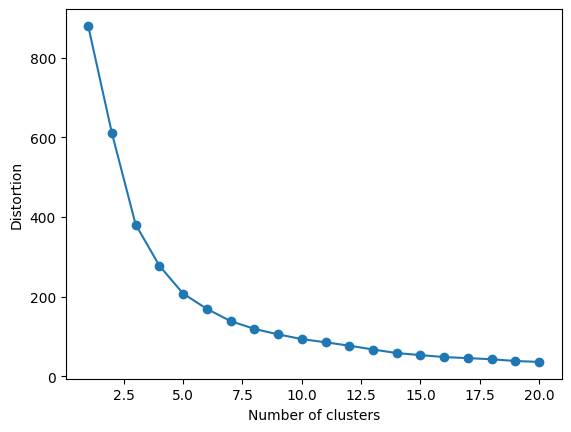

In [38]:
# elbow rule
plot_distortion(df_scaled,max_clusters=20)

- The selected number of clusters is 5.

In [39]:
# Fit the model

km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit data
y_km = km.fit_predict(X)

In [40]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

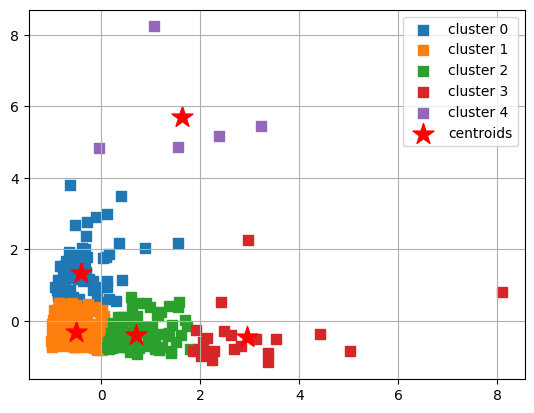

In [41]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [42]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

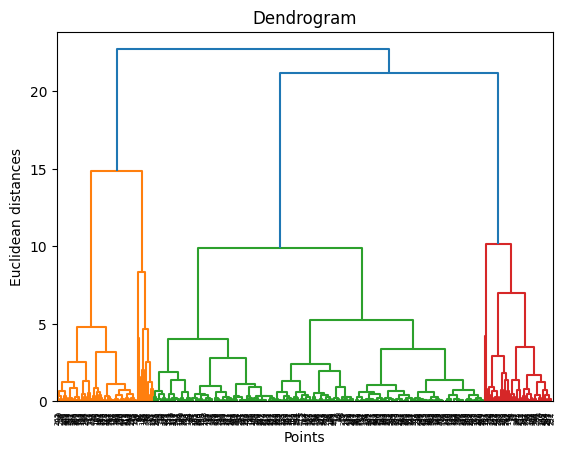

In [43]:
plot_dendrogram(X)

- The selected number of clusters is 3.

In [46]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


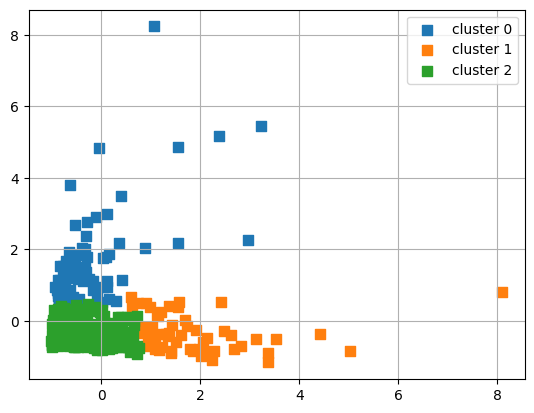

In [47]:
y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [48]:
pca = PCA(n_components=None)
df2_pca = pca.fit(df)

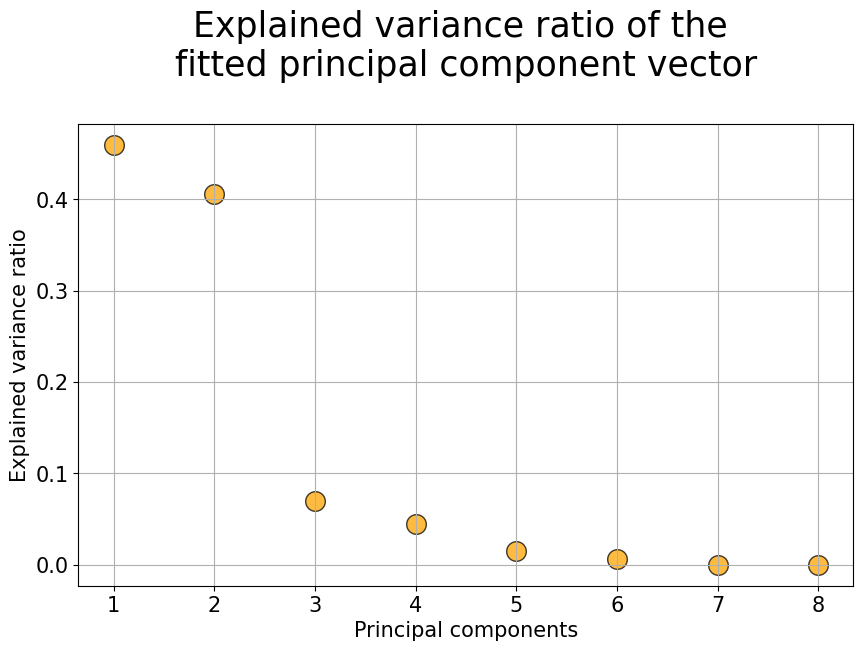

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df2_pca.explained_variance_ratio_))],
            y=df2_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df2_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [29]:
pca.explained_variance_ratio_

array([4.59613616e-01, 4.05172267e-01, 7.00300803e-02, 4.40234434e-02,
       1.50221159e-02, 6.13847509e-03, 1.65918973e-09, 3.39997724e-10])

- By using the attribute explained_variance_ratio_, we can see that the first principal component contains 46% of the variance and the second principal component contains 41% of the variance. Together, the two components contain 87% of the information.

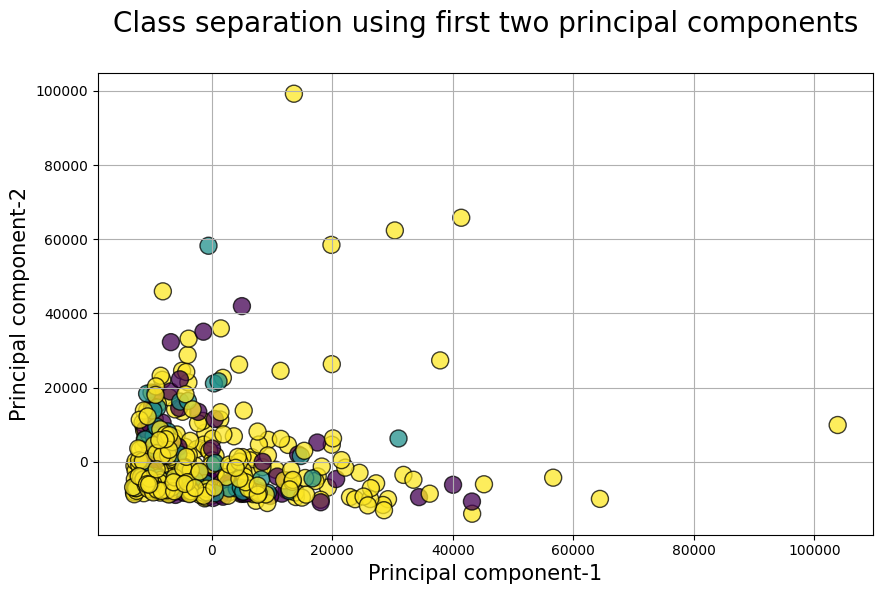

In [30]:
dfx_trans = pca.transform(df)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Region'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The highest correlation is between Grocery and Detergents Paper, the second highest is between grocery and milk and the third highest is between Detergents Paper and Milk.
- All the features are numerical however two features (Region and Channel) are discrete while others are continuous.
- According to hierarchical clustering, the optimal number of clusters is 3 and according to k-means clustering the optimal number of clusters is 5.
- By using the attribute explained_variance_ratio_, we can see that the first principal component contains 46% of the variance and the second principal component contains 41% of the variance. Together, the two components contain 87% of the information. Therefore, there are two important features in the dataset.